# Explore here

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns

In [46]:

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [47]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [48]:
birdy_uri = 'spotify:artist:1wGIhYkKWSq4yACtTkCkSX'
spotify

#results = spotify.artist_albums(birdy_uri, album_type='album')
#albums = results['items']
#hile results['next']:
#    results = spotify.next(results)
 #   albums.extend(results['items'])

#for album in albums:
#    print(album['name'])

In [49]:
results = spotify.artist_top_tracks(birdy_uri)
tracks = results['tracks']
for track in tracks:
    print(track['name'])

Querer Querernos
Maquiavélico
Stupid Love Story
Es Épico
Pensando en Ti
Jeremías 17-5
De la Vida Como Pelicula, Tragedia, Comedia y Ficcion
Mundo de Piedra
Mañana Será Otro Día
Llovía


In [54]:
df= pd.DataFrame(tracks)
df['duration_min'] = df['duration_ms'].apply(
    lambda x: f"{x // 60000}:{(x % 60000) // 1000:02d}"
)
df[["name", "duration_min", "popularity"]]

,name,duration_min,popularity
0,Querer Querernos,4:00,76
1,Maquiavélico,4:44,74
2,Stupid Love Story,4:46,73
3,Es Épico,6:01,71
4,Pensando en Ti,4:04,71
5,Jeremías 17-5,5:18,70
6,"De la Vida Como Pelicula, Tragedia, Comedia y ...",8:01,69
7,Mundo de Piedra,4:44,67
8,Mañana Será Otro Día,3:17,67
9,Llovía,4:52,66


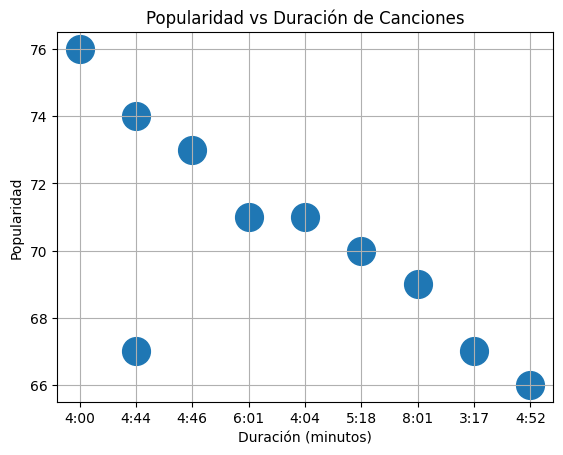

In [51]:
plt.scatter(df['duration_min'], df['popularity'], s=400)

plt.title('Popularidad vs Duración de Canciones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.grid(True)

plt.show()